Training R-squared: 0.85
Testing R-squared: -3.77
Predicted price for 2023-12-05: $65.82
Predicted price for 2023-12-06: $65.83
Predicted price for 2023-12-07: $65.84
Predicted price for 2023-12-08: $65.85
Predicted price for 2023-12-09: $65.86
Predicted price for 2023-12-10: $65.87
Predicted price for 2023-12-11: $65.88


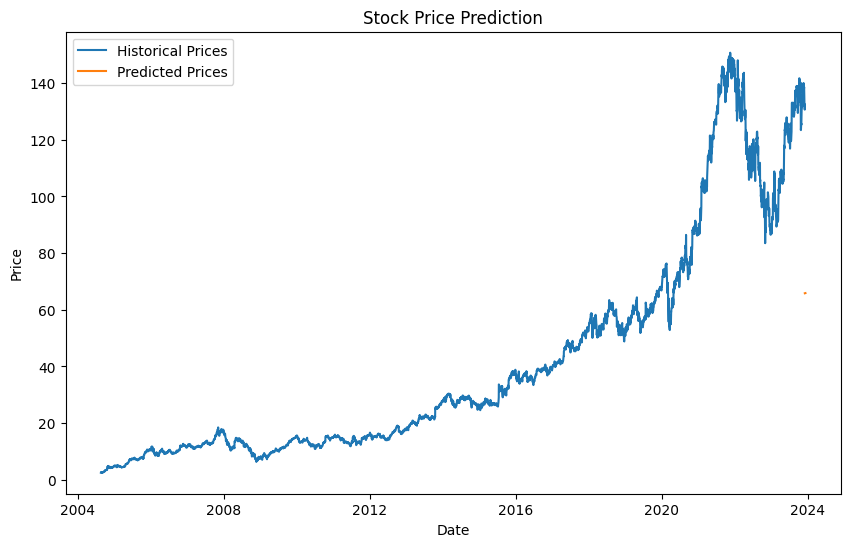

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.linear_model import Ridge

def predict_future_prices_ridge(dataframe, num_days):
    # Prepare the data
    X = dataframe.index.astype('int64') // 10**9  # Convert dates to Unix timestamp (seconds since epoch)
    y = dataframe['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, shuffle=False)

    # Train the Ridge regression model
    model = Ridge()
    model.fit(X_train, y_train)

    # Calculate R-squared for training and testing data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'Training R-squared: {train_score:.2f}')
    print(f'Testing R-squared: {test_score:.2f}')

    # Make predictions for future dates
    last_date = dataframe.index[-1]
    future_dates = pd.date_range(start=last_date, periods=num_days, freq='D')
    future_timestamps = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    future_prices = model.predict(future_timestamps.values.reshape(-1, 1))

    # Print the predicted stock prices
    for date, price in zip(future_dates, future_prices):
        print(f'Predicted price for {date.date()}: ${price:.2f}')

    # Plot the predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe['Close'], label='Historical Prices')
    plt.plot(future_dates, future_prices, label='Predicted Prices')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Load data from a CSV file into a DataFrame
df = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
# Call the function to predict future prices for 7 days
num_days = 7
predict_future_prices_ridge(df, num_days)